<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:ahmadreza majlesara

**Student ID**:400101861





## Importing Libraries

First we import libraries that we need for this assignment.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.exceptions import DataConversionWarning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [5]:
X, Y = None, None


### START CODE HERE ###
data = pd.read_csv('data_logistic.csv')

X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values.reshape(-1, 1)
### END CODE HERE ###

print(X.shape)
print(Y.shape)
print(X[:10])
print(Y[:10])

(10000, 3)
(10000, 1)
[[ 212.3336436   327.3821731   259.6832812 ]
 [  80.91978594 1006.053094    446.5164846 ]
 [ 578.7344137   994.6926298   690.1343431 ]
 [ 305.0326315   129.3307823   300.8593097 ]
 [ 619.6327388   640.43345     398.8456938 ]
 [ 315.915717    509.0300312    29.26469043]
 [ 999.9202223   896.3121866   892.3366086 ]
 [ 721.1379446   786.6805022   187.1686526 ]
 [  95.88855179  881.5834742   255.3789019 ]
 [ 438.2258234   987.9277497    51.69301918]]
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.



<span style="color:pink;">

**Answer**:

**1. Faster Convergence:** When features are on different scales, gradient descent (the algorithm commonly used to optimize many machine learning models) can take longer to converge. Normalizing the data to a similar scale helps the algorithm to converge more quickly by ensuring that each feature contributes equally to the distance calculations, avoiding distortions in the feature space.

**2. Improved Accuracy:** Models, particularly those that use distance calculations such as k-nearest neighbors (KNN) and support vector machines (SVM), can perform poorly if features are not on the same scale. This is because features with larger scales dominate the distance calculations, potentially leading to inaccurate predictions.

**3. Avoid Numerical Instability:** Some algorithms, especially those involving matrix computations (like in neural networks), can suffer from numerical instability due to very high or low input values. Normalization helps to prevent values that are too large or too small, which can cause computational problems (like overflow or underflow) during training.

**4. Algorithm Requirement:** Certain algorithms, such as those using L1 or L2 regularization, assume data centered around 0. Normalization helps meet these assumptions, thereby allowing the algorithms to perform as expected.

**5. Uniformity:** Applying normalization ensures that the input parameters are uniformly evaluated, especially important in models that involve regularization or feature weighting, ensuring that no feature is unfairly penalized or overweighted due to its scale.

</span>


In [6]:
### START CODE HERE ###
# Normalize X
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Normalize Y
Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y_normalized = (Y - Y_mean) / Y_std

print(X_normalized[:10])
print(Y_normalized[:10])
### END CODE HERE ###

[[-1.00066149 -0.60536985 -0.85021999]
 [-1.45366949  1.73051062 -0.20238503]
 [ 0.26239007  1.69140966  0.64234794]
 [-0.68111085 -1.28703215 -0.70744413]
 [ 0.4033742   0.47210428 -0.36768115]
 [-0.64359483  0.01983401 -1.64918514]
 [ 1.71429585  1.35279937  1.34347437]
 [ 0.75328151  0.97546405 -1.1016609 ]
 [-1.40206937  1.30210542 -0.86514521]
 [-0.22196916  1.66812598 -1.57141601]]
[[ 0.70832689]
 [ 0.70832689]
 [ 0.70832689]
 [-1.41177754]
 [ 0.70832689]
 [ 0.70832689]
 [ 0.70832689]
 [ 0.70832689]
 [ 0.70832689]
 [ 0.70832689]]


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [9]:
### START CODE HERE ###
X_normalized_with_bias = np.insert(X_normalized, 0, 1, axis=1)

### END CODE HERE ###

print(X_normalized_with_bias.shape)
print(X_normalized_with_bias[:10])

(10000, 4)
[[ 1.         -1.00066149 -0.60536985 -0.85021999]
 [ 1.         -1.45366949  1.73051062 -0.20238503]
 [ 1.          0.26239007  1.69140966  0.64234794]
 [ 1.         -0.68111085 -1.28703215 -0.70744413]
 [ 1.          0.4033742   0.47210428 -0.36768115]
 [ 1.         -0.64359483  0.01983401 -1.64918514]
 [ 1.          1.71429585  1.35279937  1.34347437]
 [ 1.          0.75328151  0.97546405 -1.1016609 ]
 [ 1.         -1.40206937  1.30210542 -0.86514521]
 [ 1.         -0.22196916  1.66812598 -1.57141601]]


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [13]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###

    return 1 / (1 + np.exp(-Z))
    ### END CODE HERE ###



In [14]:
vector = np.array([0.5, -1.0, 2.0])

matrix = np.array([[1.0, 2.0, -1.0],
                   [-0.5, 1.5, 0.0]])



vector_sigmoid = sigmoid(vector)
print("Vector sigmoid:", vector_sigmoid)

matrix_sigmoid = sigmoid(matrix)
print("Matrix sigmoid:")
print(matrix_sigmoid)

Vector sigmoid: [0.62245933 0.26894142 0.88079708]
Matrix sigmoid:
[[0.73105858 0.88079708 0.26894142]
 [0.37754067 0.81757448 0.5       ]]


### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [30]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    ### BEGIN: CODE ###

    h = sigmoid(np.dot(X, theta))
    regularization_term = (regLambda / (2 * m)) * np.sum(np.square(theta[1:]))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        loss = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + regularization_term

    ### END: CODE ###
    return loss


### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

For $j \geq 1$ , the partial derivative of the cost function $\mathcal{J}(\theta)$ with respect to $\theta_j$ includes both the gradient of the logistic loss function and the gradient of the regularization term. The derivative is given by:

$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \frac{1}{n} \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} + \frac{\lambda}{n} \theta_j
$$


In [16]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    h = sigmoid(np.dot(X, theta))
    regularization_term = (regLambda / m) * theta
    regularization_term[0] = 0
    grad = (1 / m) * np.dot(X.T, (h - y)) + regularization_term
    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [17]:

def fit(X, y, regLambda=0.01, alpha=0.01, epsilon=1e-4, maxNumIters=100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []
    
    for i in range(maxNumIters):
        theta_old = theta.copy()
        
        grad = computeGradient(theta, X, y, regLambda)
        
        theta -= alpha * grad
        
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)
        
        if hasConverged(theta_old, theta, epsilon):
            break
    
    return theta, loss_history


def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in previous iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    return np.linalg.norm(theta_new - theta_old) <= epsilon

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [20]:
# calculating theta and loss of each iteration
theta, loss_history = fit(X_normalized_with_bias, Y_normalized)

### START CODE HERE ###
for i, loss in enumerate(loss_history):
    print(f"Iteration{i+1}: Loss={loss}")

print("Final Theta:")
print(theta)
### END CODE HERE ###

Iteration1: Loss=0.6844231894886044
Iteration2: Loss=0.6757430885565388
Iteration3: Loss=0.6671066508137953
Iteration4: Loss=0.6585136456832319
Iteration5: Loss=0.649963839094398
Iteration6: Loss=0.641456993617721
Iteration7: Loss=0.6329928685988297
Iteration8: Loss=0.624571220292854
Iteration9: Loss=0.6161918019985356
Iteration10: Loss=0.6078543641919977
Iteration11: Loss=0.5995586546600191
Iteration12: Loss=0.5913044186326691
Iteration13: Loss=0.5830913989151598
Iteration14: Loss=0.5749193360187808
Iteration15: Loss=0.5667879682907841
Iteration16: Loss=0.5586970320430971
Iteration17: Loss=0.55064626167974
Iteration18: Loss=0.5426353898228389
Iteration19: Loss=0.5346641474371224
Iteration20: Loss=0.526732263952804
Iteration21: Loss=0.5188394673867502
Iteration22: Loss=0.51098548446185
Iteration23: Loss=0.5031700407244957
Iteration24: Loss=0.4953928606601025
Iteration25: Loss=0.48765366780659214
Iteration26: Loss=0.4799521848657743
Iteration27: Loss=0.4722881338125673
Iteration28: Loss

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [23]:



### START CODE HERE ###
# Splitting the dataset into train, validate, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X_normalized_with_bias, Y_normalized, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=1/3, random_state=42)

# Checking the shapes of the split datasets
print("Train set shapes:", X_train.shape, Y_train.shape)
print("Validation set shapes:", X_val.shape, Y_val.shape)
print("Test set shapes:", X_test.shape, Y_test.shape)
### END CODE HERE ###

Train set shapes: (7000, 4) (7000, 1)
Validation set shapes: (2000, 4) (2000, 1)
Test set shapes: (1000, 4) (1000, 1)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [25]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    h_theta = sigmoid(np.dot(X, theta))
    Y = (h_theta > 0.5).astype(int)
    return Y


Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

<span style="color:pink;">

**Answer**:
the answer is plotted in below block

</span>

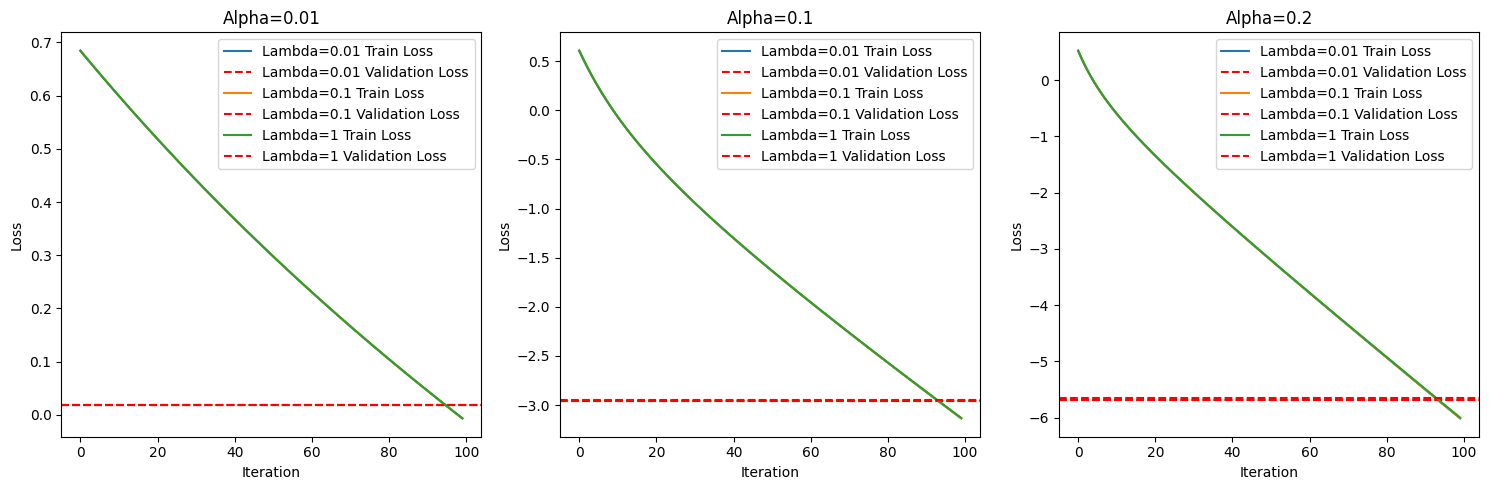

In [37]:


### START CODE HERE ###
def plot_loss(ax, alpha, regLambda_values):
    for regLambda in regLambda_values:
        theta, loss_history = fit(X_train, Y_train, regLambda=regLambda, alpha=alpha)
        val_loss = computeCost(theta, X_val, Y_val, regLambda)
        loss_history = np.array(loss_history).flatten()
        val_loss = np.array(val_loss).flatten()
        ax.plot(range(len(loss_history)), loss_history, label=f'Lambda={regLambda} Train Loss')
        ax.axhline(y=val_loss, color='r', linestyle='--', label=f'Lambda={regLambda} Validation Loss')
    ax.set_title(f"Alpha={alpha}")
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.legend()

alpha_values = [0.01, 0.1, 0.2]
regLambda_values = [0.01, 0.1, 1]

fig, axs = plt.subplots(1, len(alpha_values), figsize=(15, 5))

for i, alpha in enumerate(alpha_values):
    plot_loss(axs[i], alpha, regLambda_values)

plt.tight_layout()
plt.show()

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

<span style="color:pink;">

**Answer**:
the accuracy is the output og below block

</span>

In [48]:
### START CODE HERE ###

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the GaussianNB classifier
clf = GaussianNB()

# Train the classifier
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=DataConversionWarning)
    clf.fit(X_train, Y_train)


# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Compute the accuracy of the test set
accuracy = accuracy_score(Y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")

### END CODE HERE ###

Accuracy: 94.15%


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

<span style="color:pink;">

**Answer**:
the accuracy is the output og below block

</span>

In [50]:

### START CODE HERE ###

# Initialize the LDA classifier
clf = LinearDiscriminantAnalysis()

# Train the classifier
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=DataConversionWarning)
    clf.fit(X_train, Y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Compute the accuracy of the test set
accuracy = accuracy_score(Y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")

### END CODE HERE ###

Accuracy: 98.95%


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: